# Exploring the riverbasins

https://data.apps.fao.org/catalog/iso/1849e279-67bd-4e6f-a789-9918925a11a1

This dataset divides the European continent in major hydrological basins and their sub-basins according to its hydrological characteristics.

AQUASTAT (FAO)
Creative Commons Attribution-NonCommercial-ShareAlike 3.0 IGO

In [1]:
import geopandas as gpd
import urllib.request
import os
import zipfile
import mapclassify

In [2]:
#riverbasins = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\raster\riverbasins\hydrobasins_europe\hydrobasins_europe.shp")

In [5]:
zip_file_url = 'https://github.com/atanasova16/GeospatialAnalysisProject/raw/main/Analysis_and_Exploration/Data/hydrobasins_europe/hydrobasins_europe.zip'
zip_file_name = "hydrobasins_europe.zip"
    
urllib.request.urlretrieve(zip_file_url ,zip_file_name) 

z = zipfile.ZipFile(zip_file_name)

z.extractall()

filename = "hydrobasins_europe.shp"

riverbasins = gpd.read_file(os.path.join(os.getcwd(), 'hydrobasins_europe', filename))

In [6]:
riverbasins.columns

Index(['SUB_BAS', 'TO_BAS', 'MAJ_BAS', 'SUB_NAME', 'MAJ_NAME', 'SUB_AREA',
       'MAJ_AREA', 'LEGEND', 'geometry'],
      dtype='object')

In [3]:
#bg = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\raster\Bulgaria_regions_NUTS_3\Bulgaria_regions_NUTS_3.shp")

In [2]:
zip_file_url = 'https://github.com/atanasova16/GeospatialAnalysisProject/raw/main/Analysis_and_Exploration/Data/Bulgaria_gdf/Bulgaria_regions_NUTS_3.zip'
zip_file_name = "Bulgaria_regions_NUTS_3.zip"
    
urllib.request.urlretrieve(zip_file_url ,zip_file_name) 

z = zipfile.ZipFile(zip_file_name)

z.extractall()

filename = "Bulgaria_regions_NUTS_3.shp"

bg = gpd.read_file(os.path.join(os.getcwd(), filename))

In [7]:
bg = bg.to_crs(4326).dissolve()

In [8]:
bgbasins = gpd.sjoin(riverbasins, bg, predicate = "intersects")
bgbasins.explore(column = "SUB_NAME")

In [ ]:
bgbasins = gpd.sjoin(riverbasins, bg, predicate = "intersects")
bgbasins.explore(column = "SUB_NAME")

In [13]:
import contextily as cx

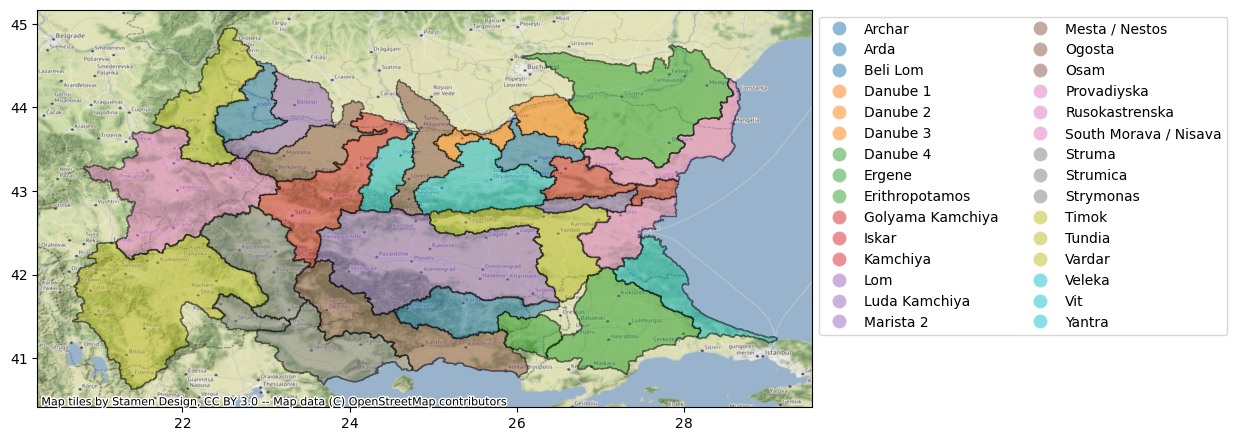

In [18]:
ax = bgbasins.plot(column = 'SUB_NAME', legend = True, legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)), figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax = ax, crs = bgbasins.crs)